# Satellite Data and Geospatial Visualization

Some content are based on https://towardsdatascience.com/satellite-imagery-access-and-analysis-in-python-jupyter-notebooks-387971ece84b

**outcomes**
- Be able to download and subset (query) satellite data
- Work with raster images
- Create RGB and NDVI images from Sentinel 2 Bands




## Review: What is a Geographic Information System (GIS)?

"A Geographic Information System (GIS) is a computer system that analyzes and displays geographically referenced information. It uses data that is attached to a unique location.

Most of the information we have about our world contains a location reference: Where are USGS streamgages located? Where was a rock sample collected? Exactly where are all of a city's fire hydrants?

If, for example, a rare plant is observed in three different places, GIS analysis might show that the plants are all on north-facing slopes that are above an elevation of 1,000 feet and that get more than ten inches of rain per year. GIS maps can then display all locations in the area that have similar conditions, so researchers know where to look for more of the rare plants.

By knowing the geographic location of farms using a specific fertilizer, GIS analysis of farm locations, stream locations, elevations, and rainfall will show which streams are likely to carry that fertilizer downstream.

These are just a few examples of the many uses of GIS in earth sciences, biology, resource management, and many other fields." [from USGS website.](https://www.usgs.gov/faqs/what-a-geographic-information-system-gis?qt-news_science_products=0#qt-news_science_products)


(Figure credit: Sexton, Pamela Ann. Public domain.)

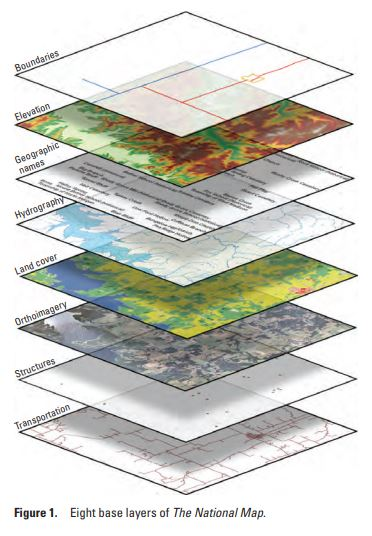

## Introduction to Satellite Data

"Satellite imagery (also Earth observation imagery, spaceborne photography, or simply satellite photo) are images of Earth collected by imaging satellites operated by governments and businesses around the world. Satellite imaging companies sell images by licensing them to governments and businesses such as Apple Maps and Google Maps. It should not be confused for astronomy images collected by space telescope." Source: https://en.wikipedia.org/wiki/Satellite_imagery

Satellites gather information about the surface (ex. the vegetation) and the weather of earth and deliver this information back to us. Satellites also gather information on other planets but we still don't have an economics of astronomy field! Maybe we do in future!!!

Here are some recent papers published in one of THE bests econ journals that have used 

1. ["Cities in Bad Shape: Urban Geometry in India"](https://www.aeaweb.org/articles?id=10.1257/aer.20171673&ArticleSearch%5Bwithin%5D%5Barticletitle%5D=1&ArticleSearch%5Bwithin%5D%5Barticleabstract%5D=1&ArticleSearch%5Bwithin%5D%5Bauthorlast%5D=1&ArticleSearch%5Bq%5D=satellite+imagery&JelClass%5Bvalue%5D=0&journal=&from=a&from=j) by Mariaflavia Harari 
    - The author measures cities' geometric properties over time using satellite imagery and historical maps. I
    - The effect of land use regulations on deformity of the cities and subsequently city expantions. 
    - Field: Development Economics
2. [Historical Legacies and African Development](https://www.aeaweb.org/articles?id=10.1257/jel.20181447&ArticleSearch%5Bwithin%5D%5Barticletitle%5D=1&ArticleSearch%5Bwithin%5D%5Barticleabstract%5D=1&ArticleSearch%5Bwithin%5D%5Bauthorlast%5D=1&ArticleSearch%5Bq%5D=satellite+imagery&JelClass%5Bvalue%5D=0&journal=&from=a&from=j) by Stelios Michalopoulos and Elias Papaioannou
    - "uncovered strong evidence of historical continuity as well as instances of rupture in the evolution of the African economy." 
    - Field: Economic History 
3. [The View from Above: Applications of Satellite Data in Economics](https://www.aeaweb.org/articles?id=10.1257/jep.30.4.171&ArticleSearch%5Bwithin%5D%5Barticletitle%5D=1&ArticleSearch%5Bwithin%5D%5Barticleabstract%5D=1&ArticleSearch%5Bwithin%5D%5Bauthorlast%5D=1&ArticleSearch%5Bq%5D=satellite+imagery&JelClass%5Bvalue%5D=0&journal=&from=a&from=j) by Dave Donaldson and Adam Storeygard


Not many econ papers have used satellite data YET! There have been reasons such as computation power that has slowed down the use of such data but we see that it is picking up and I expect using such data to be more common in economics or at least in development economics. 

The type of data you can create:
- night lights, 
- precipitation, wind speed, flooding,
- topography, forest cover, crop choice, agricultural productivity, 
- urban development, building type, roads, pollution, 
- beach quality, and fish abundance.

In this lab, we will learn to access satellite data and visualize them. In this notebook, you won't see much economics but I will give you some ideas about how this knowledge can be used with answering Econ questions. 



## Definitions


1. Satellite images are pixel wised data, we call them rasters. 
2. Raster images include: 
- Lidar data: "(light detection and ranging) is an optical remote-sensing technique that uses laser light to densely sample the surface of the earth". Read more on [arcGIS website](https://desktop.arcgis.com/en/arcmap/10.3/manage-data/las-dataset/what-is-lidar-data-.htm)
- Georeferenced maps: "A georeferenced digital map or image has been tied to a known Earth coordinate system, so users can determine where every point on the map or aerial photo is located on the Earth's surface." [From USGS website](https://www.usgs.gov/faqs/what-does-georeferenced-mean?qt-news_science_products=0#qt-news_science_products). 

[This is a cute video on the definition of raster images](https://youtu.be/FVOF0CR9ass) (ignore the photoshop tutorial part)

Each row of the rasters data contain information on 
- elevation 
- temperature
- land cover and vegetation
- water quality 



# Let's pick our satellite first!

In this notebook, we are going to use data from "Sentinel-2".

"Sentinel-2 is an Earth observation mission from the Copernicus Programme that systematically acquires optical imagery at high spatial resolution (10 m to 60 m) over land and coastal waters. The mission is a constellation with two twin satellites, Sentinel-2A and Sentinel-2B.

The mission supports a broad range of services and applications such as agricultural monitoring, emergencies management, land cover classification or water quality." Source: https://en.wikipedia.org/wiki/Sentinel-2

Sentinel-2 has been developed and is being operated by European Space Agency (ESA). The following picture is from ESA website. 

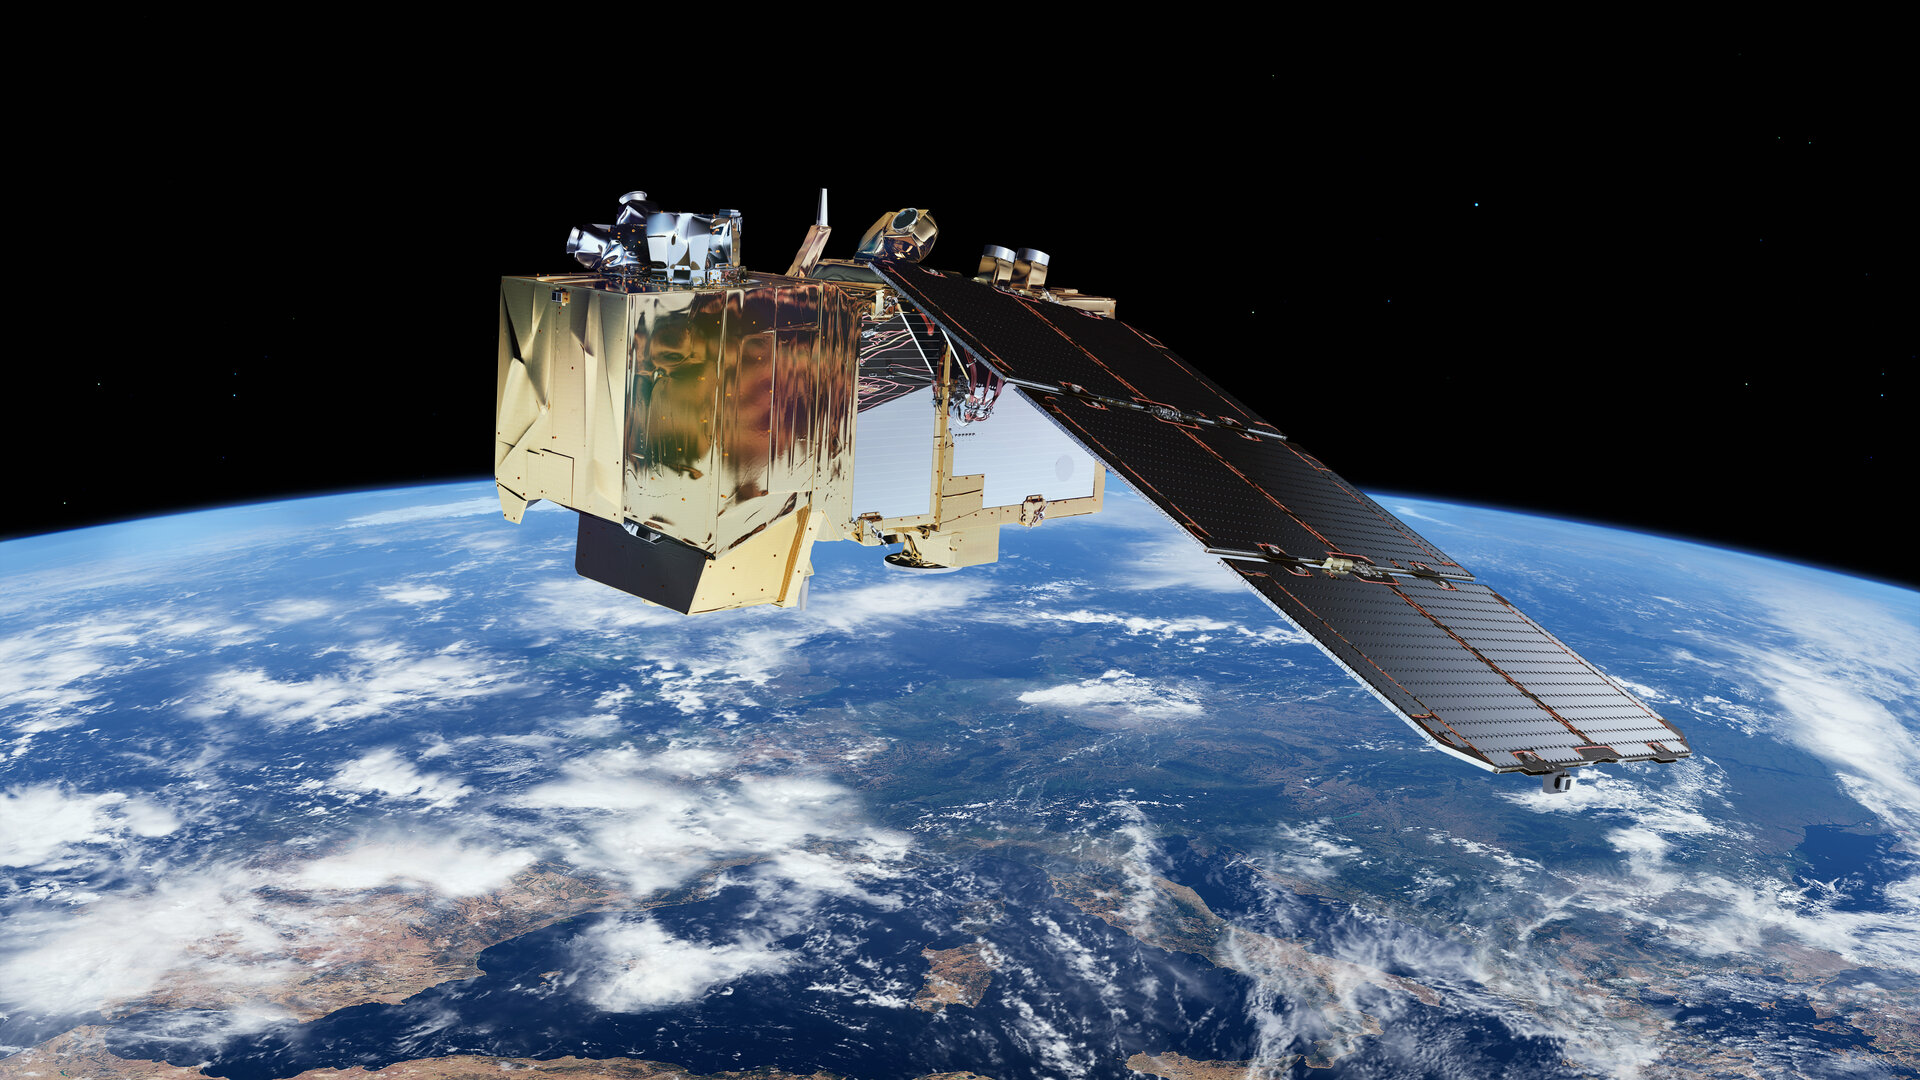

# How can I get access to satellite data?


There are libraries that will do the heavy lifting for us! We will use the sentinelsat library to directly read and query the data, however, you can also download the data directly from ESA's website here: https://sentinel.esa.int/web/sentinel/sentinel-data-access


In [1]:
# uncomment the following and install sentinelsat
!pip install sentinelsat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 2.4 MB/s eta 0:00:00


In [2]:
!pip install geopandas
!pip install folium

In [5]:
import geopandas as gpd
import folium

## Register in Copernicus Open Access Hub

"The Copernicus Open Access Hub (previously known as Sentinels Scientific Data Hub) provides complete, free and open access to Sentinel-1, Sentinel-2, Sentinel-3 and Sentinel-5P user products, starting from the In-Orbit Commissioning Review (IOCR)." Source: https://scihub.copernicus.eu

The commissions review ensures that all functions are operating correctly and delivering the specified performance, and the open-access data is from after the check has been done. 

To access this fantastic open-access data, **first you need to register** in [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/#/home). You need to remember your username and password since we will use it to access the API below; chose it wisely. Please don't use your bank's password; it shows in your notebook!
After you fill out the registration form, you will receive an email with a link that validates your account. If you skip this step, you will get an ugly error later. 


In the next cell, we use SentinelAPI method to access the API using our registered account. Paste your user/pass below. 

In [6]:
from sentinelsat import SentinelAPI

user ='anoornazri' 
password = 'Rah@3178' 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus') #remember we called it api
#We will use this SentinelAPI to query data in the "Query Data From the Satellite" section

In this lab, we will use two different data sources: 
1. Boundary files for Toronto
2. Satellite imagery from Sentinel-2, which we will download shortly from the API we created (SO EXCITING!) 

## Boundary File for Toronto
We need this boundary file to limit the map to the geography that we want to study. 

**Important Definitions**
1. **JSON:** "JavaScript Object Notation is an open standard file format, and data interchange format, that uses human-readable text to store and transmit data objects consisting of attribute–value pairs and array data types (or any other serializable value)." [source](https://en.wikipedia.org/wiki/JSON)
2. **GEOJSON:** "GeoJSON is an open standard format designed for representing simple geographical features, along with their non-spatial attributes. It is based on the JSON format. The features include points (therefore addresses and locations), line strings (therefore streets, highways and boundaries), polygons (countries, provinces, tracts of land), and multi-part collections of these types. GeoJSON features need not represent entities of the physical world only; mobile routing and navigation apps, for example, might describe their service coverage using GeoJSON."[source](https://en.wikipedia.org/wiki/GeoJSON)


### Create a Boundary File 
If you want the determined boundaries of cities, countries, etc., you should find them online (usually on Census websites). However, if you are looking for an area that is not necessarily pre-determined, you can create a boundary file by following the steps below:

1. Open https://geojson.io/
2. On the tiny toolbar to the upper right side of the map, click on the tiny rectangle or polygon shape and mark the area that you have in mind (you can zoom in before doing so)
3. On the upper toolbar, click save and then GeoJason. 

This is how we created the following boundary file for some parts of Toronto. 

In [7]:
!pip install geojsonio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for geojsonio: filename=geojsonio-0.0.3-py3-none-any.whl size=5024 sha256=ae53436649153964bdb7f4d26e6c68f97c8bbeeba0cb4b5d3ed63567f72e9f00
  Stored in directory: /Users/adieaimannazrinnoornazri/Library/Caches/pip/wheels/c8/60/2b/82eccc37489e717cf7fc49aba7f8f9b03f3d33e59ba1be3481
Successfully built geojsonio


In [19]:
import geojsonio
import requests  # to call data from a url
from sentinelsat import geojson_to_wkt, read_geojson

url = 'https://github.com/Farhoodi/ECO225_data/raw/main/map.geojson'
r=requests.get(url)

open('toronto.geojson', 'wb').write(r.content) # 'w' or 'wb': indicates we want to write a file

316

In [20]:
import fiona

In [21]:
import geopandas as gpd
import folium    # for plotting easy street maps

from sentinelsat import geojson_to_wkt, read_geojson

toronto = read_geojson('toronto.geojson')
toronto_bounds = gpd.read_file('toronto.geojson') # we use this to crop the satellite image later on

## Prepare the Base Map

We are still getting ready for the big moment. Let's follow these steps: 
1. Create an empty folium map around the center of Toronto. The long/lat for the center of the city is [43.6532, -79.3832]; you can google and find long/lats for any city, for your current location, or any other point on planet earth!
2. We can then add Toronto bounds (shapefile) to our folium map. 
    - We will use the footprints of this shapefile to query data from the satellite.
    - Later on, we use these bounds to crop our satellite image and limit the HUGE amount of data to something that is useful for our purpose.


In [22]:
m = folium.Map(location=[43.6532, -79.3832], zoom_start=13)
folium.GeoJson(toronto).add_to(m) #adds toronto.geojason (blue square) to the map (SUPER COOL)
m

In [13]:
footprint=geojson_to_wkt(toronto) #transform geojson to Well-Known Text to get footprint
footprint # we need the footprint to query data in the next step

'GEOMETRYCOLLECTION(POLYGON((-79.4339 43.6102,-79.3076 43.6102,-79.3076 43.6689,-79.4339 43.6689,-79.4339 43.6102)))'

## Query Data from the Satellite

In the previous parts, we chose Toronto as the location to extract satellite imegary for. Here are the steps that we need to follow:

1. Query data from the satellite (Sentinel-2) for the footprint of Toronto
2. Get the GeoDataframe and find the file name
3. api.download(filename), this will create a folder in your working directory with some files that 
we will use to create our first image.

(modify below for the exercise, find more info at the end of the notbeook) <a id='date'></a>

In [24]:
products = api.query(footprint, #for Toronto
                     date = ('20221101', '20221111'), #for this date
                     platformname = 'Sentinel-2', #from this satellite
                     processinglevel = 'Level-2A', 
                     cloudcoverpercentage = (0,10) #less cloud
                    )
# Level-2A product provides Bottom Of Atmosphere (BOA) reflectance images

There are more processing levels (0,1A,1B,1C,2A) for this satellite, only 1C and 2A is released. 
Read more in [ESA's website](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-2-msi/product-types/level-2a)

Below, we sort based on cloud coverage in case we have multiple products. If you see multiple products in a given time period, you can choose the file in the first row because it has the smallest cloud coverage (ascending=[True]).

In [25]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
956f1450-6694-46c2-b804-a4512656358d,S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-11-07T16:14:49.024Z, Instrument: MS...",false,2022-11-07 19:06:50,2022-11-07 16:14:49.024,2022-11-07 16:14:49.024,2022-11-08 03:29:05.069,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20221107T190650_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20221107T190650_A0296...,S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_2...,956f1450-6694-46c2-b804-a4512656358d,"MULTIPOLYGON (((-78.41620 43.23560, -78.37335 ..."


Above, we see a dictionary of all the pictures (products) that have been taken from Toronto in this period of time and with the level of cloud coverage. In this case, we see only one image. If you play with the date or cloud coverage, you may find more images. Now that we have a list of products available (here is just one), we can download the associated data. The first bold code is the name of the image file that we need to download. 

Know that this satellite revisits each location **every 5 days**; therefore, you may not have an image for some days. If you don't find a product for a certain period of time, make your date window larger.

Let's do this!

In [16]:
api.download("956f1450-6694-46c2-b804-a4512656358d")#The file name is the name of previous output. 
#This file is large, delete it after you are done with this lab!!!

MD5 checksumming:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

{'id': '956f1450-6694-46c2-b804-a4512656358d',
 'title': 'S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_20221107T190650',
 'size': 1047171595,
 'md5': '55bbee6bccef8bc625482ec721845a2e',
 'date': datetime.datetime(2022, 11, 7, 16, 14, 49, 24000),
 'footprint': 'POLYGON((-79.74753 44.24655093494868,-78.37335 44.22320974043625,-78.4162 43.235600960154144,-79.767975 43.25815531909012,-79.74753 44.24655093494868))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('956f1450-6694-46c2-b804-a4512656358d')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 11, 8, 3, 42, 13, 720000),
 'Ingestion Date': datetime.datetime(2022, 11, 8, 3, 29, 5, 69000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('956f1450-6694-46c2-b804-a4512656358d')/Products('Quicklook')/$value",
 'path': 'S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_20221107T190650.zip',
 'downloaded_bytes': 1047171595}

In [17]:
# Below we will unzip the file we just downloaded: 

import glob
import zipfile
files = glob.glob('*.zip')
files
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_20221107T190650')

Unzipping: 30d86438-f74e-4118-8625-0157e5acc319.zip
Unzipping: S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_20221107T190650.zip


## Create Your First Satellite RGB Image

***IMPORTANT IMPORTANT IMPORTANT***
After you download the image file (in the previous step), go to your working directory and find the zip file and unzip it. If you don't do this, you won't be able to run the rest of the code. 

The picture below shows how you can navigate to the folder that contains the images that we want to work with later on. Note that when you query for different dates, location, etc., you get other file names. Make sure to change all the necessary parts of the code for yourself if you are working on a different product.

(Oops, ignore the yellow dots. I didn't wait enough for the files to be uploaded on my cloud folder to take the picture, haha!) 

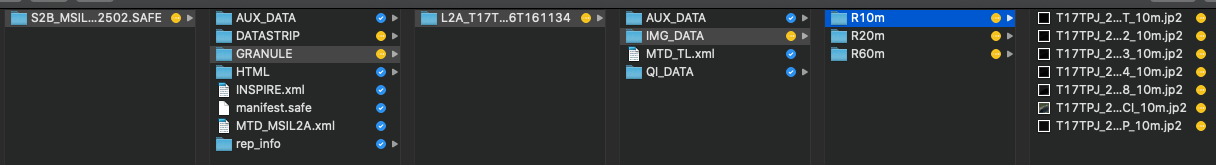

You can see multiple files in the R10m (10-meter resolution) folder. Each file is corresponding to one of the bands in the table below. You could potentially get higher resolution images from other satellites (even to cm or mm level!!!). Those are usually not accessible to the public, and even if they are, not for free. So, be happy with this R10m folder.

The Sentinel-2 satellite has 13 bands in the visible (blue, green, red,...), near-infrared (NIR), and shortwave infrared (SWIR) part of the spectrum. 

If you look closer to the name of the files in the R10m folder (for instance, T17TPJ_20190606T160839_B04_10m.jp2), you can see that it indicates that the picture is from which band. In this example, it is B04 from a 10-meter resolution. Look at the table below, band 4 is Red! 


Next, we will read these files using the Rasterio library (it gets even more exciting! hold on!)

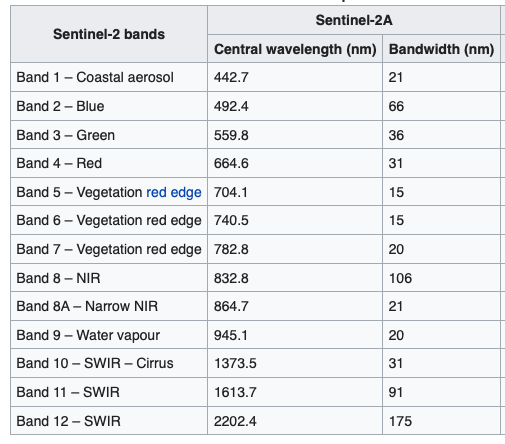

[source](https://en.wikipedia.org/wiki/Sentinel-2)

In [67]:
#Uncomment below to installed rasterio
!pip install rasterio 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 24.2 MB/s eta 0:00:0000:0100:01


In [68]:
import rasterio as rio
from rasterio import plot
import matplotlib.pyplot as plt
from rasterio.mask import mask #Mask the area outside of the input shapes with no data.

%matplotlib inline

In [69]:
import os
os.getcwd()

'/Users/adieaimannazrinnoornazri/ECO225/Week 6 '

For one part of the exercise, you should submite a picture of the following cell 
in your own code. <a id='code'></a>
Your folder and file names will be different because you will be working on a different time window.

# Open Bands 4, 3 and 2 with Rasterio
R10 = 'S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_20221107T190650/S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_20221107T190650.SAFE/GRANULE/L2A_T17TPJ_A029624_20221107T161451/IMG_DATA/R10m'
b2 = rio.open(R10+'/T17TPJ_20221107T161449_B02_10m.jp2') #blue
b3 = rio.open(R10+'/T17TPJ_20221107T161449_B03_10m.jp2') #green
b4 = rio.open(R10+'/T17TPJ_20221107T161449_B04_10m.jp2') #red
b8 = rio.open(R10+'/T17TPJ_20221107T161449_B08_10m.jp2') #Near-Infrared Band (NIR)
# A JP2 file is a compressed bitmap image

# Create an RGB image 
with rio.open('RGB_toronto.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),3) #3 because we are using RGB and Blue is 3 in RGB 
    rgb.write(b3.read(1),2) #Green is 2
    rgb.write(b4.read(1),1) #Red is 1
    rgb.close()
# A TIFF file is a graphics container that stores raster images in the Tagged Image File Format (TIFF). 

src = rio.open(r"RGB_toronto.tiff", count=3) #count = 3 says we have 3 bands
plot.show(src) #What you see below is not the actual .tiff picture.
               #However, the file includes all required information. 
               #Use QGIS to see the actual picture, 
               #you can download it here: https://qgis.org/en/site/forusers/download.html

In [26]:
b4.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32617),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 4900020.0)}

In [27]:
b4.read() #information about shades of colors. 

array([[[1592, 1572, 1593, ..., 1736, 1636, 1692],
        [1564, 1636, 1664, ..., 1810, 1679, 1678],
        [1612, 1650, 1639, ..., 1802, 1698, 1662],
        ...,
        [1738, 1836, 1850, ..., 1435, 1414, 1422],
        [1778, 1734, 1806, ..., 1454, 1421, 1439],
        [1834, 1726, 1789, ..., 1622, 1572, 1574]]], dtype=uint16)

## Calculate the Normal Difference Vegetation Index (NDVI)

OK, if we know the colors of the images taken by the satellite, we should be able to see where the forests are! 
Here we can use the near-infrared (NIR) and red bands to calculate an index for vegetation. This index is frequently used and is simple to calculate. 


"The normalized difference vegetation index (NDVI) is a simple graphical indicator that can be used to analyze remote sensing measurements, often from a space platform, assessing whether or not the target being observed contains live green vegetation." Read more on [wiki](https://en.wikipedia.org/wiki/Normalized_difference_vegetation_index) about why values of this index indicate green coverage.




In [28]:
# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)


with rio.open('NDVI_toronto.tiff', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))
    
# ** collects all the keyword arguments in a dictionary, we want to keep the keywords of meta

/var/folders/wk/g003zbvs5jv5zylkmcf6l4400000gn/T/ipykernel_5312/1845999549.py:6: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir.astype(float)-red.astype(float))/(nir+red)


For the exercise you should create and take a screenshot of the following map. <a id='map'></a>

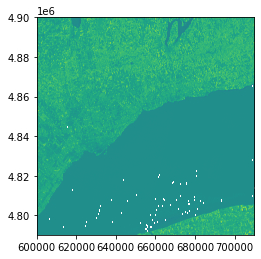

<AxesSubplot:>

In [29]:
src = rio.open(r"NDVI_toronto.tiff", count=3) 
#raw strings use different rules for backslash escape sequences (too technical)
plot.show(src)
#darker means less vegetation

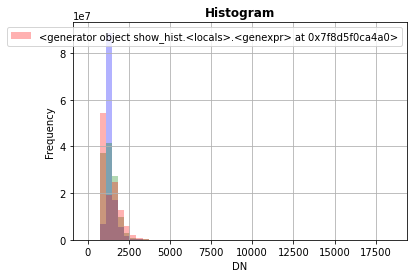

In [30]:
file = rio.open("RGB_toronto.tiff")
plot.show_hist(file, bins = 50, stacked= False, alpha=.3, lw=0, histtype= "stepfilled")

## Clip Toronto Area (optional)

You can clip the data to the specific area that you want to focus on to make your maps look nicer and also to make the data smaller and more managable. 

In [31]:
b4.meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 1,
 'crs': CRS.from_epsg(32617),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 4900020.0)}

In [32]:
bounds_proj = toronto_bounds.to_crs({'init': 'epsg:32617'})
# toronto_bounds was a GeoJson file, now we should project it to CRS
# crs: Coordinate Reference Systems

/Users/nazaninkhazra/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [33]:
with rio.open("RGB_toronto.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, bounds_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rio.open("RGB_masked.tiff", "w", **out_meta) as dest:
    dest.write(out_image)

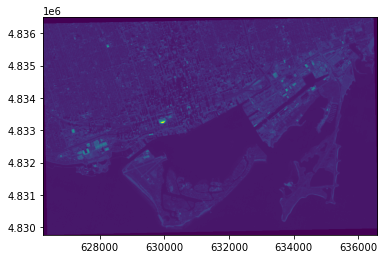

<AxesSubplot:>

In [34]:
src = rio.open(r"RGB_masked.tiff", count=3)
plot.show(src)

In [35]:
with rio.open("NDVI_toronto.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, bounds_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rio.open("NDVI_masked.tiff", "w", **out_meta) as dest:
    dest.write(out_image)

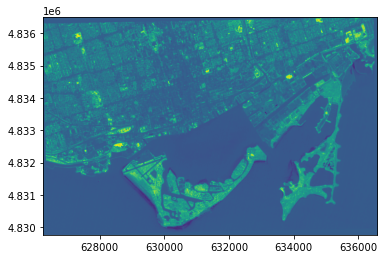

<AxesSubplot:>

In [36]:
src = rio.open(r"NDVI_masked.tiff", count=3)
plot.show(src)

**Exercise**

**Goal: create an NDVI map for the Toronto area for a different time period.**


Follow these steps: 
1. Please go to where we defined the variable "products" [here](#date) and change the last digit of the month or the day to the last digit of your student number. For example, if your student number ends in 5, you will change 20221101 to 20221105 (and move the second date accordingly). If no images exist for your date, try changing the month. In your code explain which you changed.
2. Re-run the code, make the necessary adjustments, and submit the following parts on Crowdmark

Submit these on Crowdmark: 
1. A screenshot of your code where you define the variable "products" [here](#date). This should reflect the change in year that was described above. Q1
2. A screenshot of your code that shows the name of your folders and files corresponding to the new data that you have downloaded from the satellite [here](#code). Q2
3. A screenshot of your NDVI map with the new data that you have downloaded. You will get your map at [this](#map) part of the code. Q3


If you have any clarifying questions regarding the exercise, please ask them well in advance of (at least 3 days before) the deadline.

## Q1

In [63]:
products2 = api.query(footprint, #for Toronto
                     date = ('20221001', '20221123'), #changed the back to 01 and 23
                     platformname = 'Sentinel-2', 
                     processinglevel = 'Level-2A', 
                     cloudcoverpercentage = (0,10) 
                    )

## Q2

In [64]:
products_gdf2 = api.to_geodataframe(products2)
products_gdf_sorted2 = products_gdf2.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted2

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
956f1450-6694-46c2-b804-a4512656358d,S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-11-07T16:14:49.024Z, Instrument: MS...",false,2022-11-07 19:06:50,2022-11-07 16:14:49.024,2022-11-07 16:14:49.024,2022-11-08 03:29:05.069,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20221107T190650_S2022...,S2B_OPER_MSI_L2A_TL_2BPS_20221107T190650_A0296...,S2B_MSIL2A_20221107T161449_N0400_R140_T17TPJ_2...,956f1450-6694-46c2-b804-a4512656358d,"MULTIPOLYGON (((-78.41620 43.23560, -78.37335 ..."
8592cb3b-474e-4c6b-b2a1-1ea16dc7a212,S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2022-10-23T16:13:31.024Z, Instrument: MS...",false,2022-10-23 21:54:00,2022-10-23 16:13:31.024,2022-10-23 16:13:31.024,2022-10-24 00:06:32.675,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_ATOS_20221023T215400_S2022...,S2A_OPER_MSI_L2A_TL_ATOS_20221023T215400_A0383...,S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_2...,8592cb3b-474e-4c6b-b2a1-1ea16dc7a212,"MULTIPOLYGON (((-78.41620 43.23560, -78.37335 ..."


### Only using the 2nd row as the first first row is from this lab's example

In [65]:
api.download("8592cb3b-474e-4c6b-b2a1-1ea16dc7a212")

MD5 checksumming:   0%|          | 0.00/1.05G [00:00<?, ?B/s]

{'id': '8592cb3b-474e-4c6b-b2a1-1ea16dc7a212',
 'title': 'S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_20221023T215400',
 'size': 1050579495,
 'md5': '4f8ad4c87b9d2211df234aea7aed52e6',
 'date': datetime.datetime(2022, 10, 23, 16, 13, 31, 24000),
 'footprint': 'POLYGON((-79.74753 44.24655093494868,-78.37335 44.22320974043625,-78.4162 43.235600960154144,-79.767975 43.25815531909012,-79.74753 44.24655093494868))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('8592cb3b-474e-4c6b-b2a1-1ea16dc7a212')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2022, 10, 24, 0, 7, 15, 17000),
 'Ingestion Date': datetime.datetime(2022, 10, 24, 0, 6, 32, 675000),
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('8592cb3b-474e-4c6b-b2a1-1ea16dc7a212')/Products('Quicklook')/$value",
 'path': 'S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_20221023T215400.zip',
 'downloaded_bytes': 1050579495}

In [78]:
# Below we will unzip the file we just downloaded: 

import glob
import zipfile
files = glob.glob('*.zip')
files
for file in files:
    print('Unzipping:',file)

    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall('S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_20221023T215400')

Unzipping: S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_20221023T215400.zip


In [79]:
# Open Bands 4, 3 and 2 with Rasterio
R10 = '/Users/adieaimannazrinnoornazri/ECO225/Week 6 /S2A_MSIL2A_20221023T161331_N0400_R140_T17TPJ_20221023T215400.SAFE/GRANULE/L2A_T17TPJ_A038318_20221023T161328/IMG_DATA/R10m'
b2 = rio.open(R10+'/T17TPJ_20221023T161331_B02_10m.jp2') #blue
b3 = rio.open(R10+'/T17TPJ_20221023T161331_B03_10m.jp2') #green
b4 = rio.open(R10+'/T17TPJ_20221023T161331_B04_10m.jp2') #red
b8 = rio.open(R10+'/T17TPJ_20221023T161331_B08_10m.jp2') #Near-Infrared Band (NIR)
# A JP2 file is a compressed bitmap image

## Q3

In [80]:
# Create an RGB image 
with rio.open('RGB_toronto.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),3) #3 because we are using RGB and Blue is 3 in RGB 
    rgb.write(b3.read(1),2) #Green is 2
    rgb.write(b4.read(1),1) #Red is 1
    rgb.close()
# A TIFF file is a graphics container that stores raster images in the Tagged Image File Format (TIFF). 

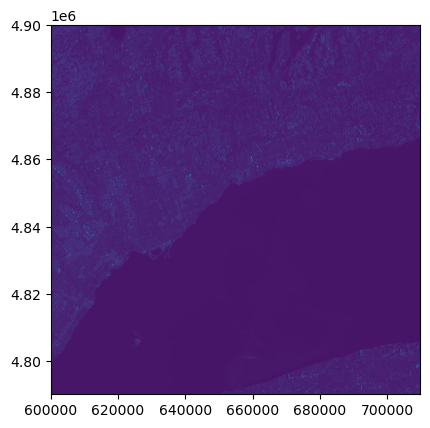

<AxesSubplot: >

In [81]:
src = rio.open(r"RGB_toronto.tiff", count=3) #count = 3 says we have 3 bands
plot.show(src) #What you see below is not the actual .tiff picture.
               #However, the file includes all required information. 
               #Use QGIS to see the actual picture, 
               #you can download it here: https://qgis.org/en/site/forusers/download.html

In [82]:
# read Red(b4) and NIR(b8) as arrays
red = b4.read()
nir = b8.read()

# Calculate ndvi
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

# Write the NDVI image
meta = b4.meta
meta.update(driver='GTiff')
meta.update(dtype=rio.float32)


with rio.open('NDVI_toronto.tiff', 'w', **meta) as dst:
    dst.write(ndvi.astype(rio.float32))
    
# ** collects all the keyword arguments in a dictionary, we want to keep the keywords of meta

/var/folders/5k/mklfc3z159ddw6b0m8_kwp0c0000gn/T/ipykernel_62655/1845999549.py:6: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir.astype(float)-red.astype(float))/(nir+red)


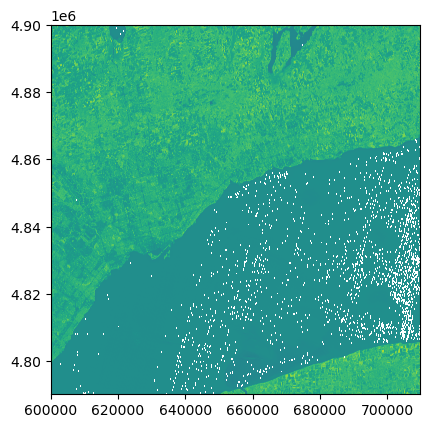

<AxesSubplot: >

In [83]:
src = rio.open(r"NDVI_toronto.tiff", count=3) 
#raw strings use different rules for backslash escape sequences (too technical)
plot.show(src)
#darker means less vegetation